In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def local(L,num):

  right = num+1
  if right % L == 0:
    right -= L

  left = num-1
  if (left+1) % L == 0:
    left += L

  up = num - L
  if up < 0:
    up += L*L

  down = num + L
  if down >= L*L:
    down -= L*L

  return np.array([right,up,left,down])

def local_E(arr, num):
  L=int(np.sqrt(len(arr)))
  return -np.sum(arr[local(L,num)])*arr[num]

In [ ]:
#개선점 1:기존에는 요소들의 수만큼 local_E함수의 반복을 하여야 했지만, 4번의 합을 하는 것으로 같은 계산을 할 수 있는 새로운 함수를 구현해냄

# def total_energy(S): # 이 함수는 "첫 시행에서만 사용"하는 것으로 변경 (전체를 계산)
#   L=int(np.sqrt(len(S)))
#   E=0
#   for num in range(len(S)):
#     E += (local_E(S, num))
#   return E/2

def total_energy(S): #for문 없이 위 코드랑 같은 기능
  L=int(np.sqrt(len(S)))
  SS = S.reshape(L,L)

  SS1 = np.insert(SS, 0, SS[L-1,:], axis = 0)
  SS1 = np.delete(SS1, L, axis = 0)

  SS2 = np.insert(SS, L, SS[0,:], axis = 0)
  SS2 = np.delete(SS2, 0, axis = 0)

  SS3 = np.insert(SS, 0, SS[:,L-1], axis = 1)
  SS3 = np.delete(SS3, L, axis = 1)

  SS4 = np.insert(SS, L, SS[:,0], axis = 1)
  SS4 = np.delete(SS4, 0, axis = 1)

  SS_sum = SS1+SS2+SS3+SS4
  return -np.sum(SS * SS_sum)/2

In [ ]:
#개선점 2: 요소 하나만 뒤집은 것이기 때문에, 총 에너지의 차이도 바뀐 요소에 의한 차잇값만큼만 차이가 난다.
#이 차잇값만 알면 굳이 모든 요소를 이용해 총에너지를 계산할 필요가 없게 된다.

def delta_E(arr, num): # 바뀐 에너지와의 차잇값만 계산. (arr은 뒤집기 전의 행렬(E_S))
  L=int(np.sqrt(len(arr)))
  return 2*(arr[num]) * np.sum(arr[local(L,num)])

In [ ]:
#개선점 3: 2차원에서 요소 하나가 뒤집혀서 생기는 (에너지) 차잇값이 0보다 클때의 범위는 2종류밖에 없기 때문에 각 상황별 accept확률을 미리 계산을 해둔다.

beta=1
delta_m4 = np.exp(beta*(-4)) # 미리계산
delta_m8 = np.exp(beta*(-8)) # 미리계산

L=5
random_arr = np.random.randn(L*L)
S = random_arr/abs(random_arr)
print(S)

E_S = total_energy(S)
print(E_S)

[ 1. -1.  1. -1. -1.  1.  1.  1. -1.  1. -1.  1.  1.  1.  1.  1.  1. -1.
  1. -1.  1.  1.  1.  1. -1.]
-2.0


In [ ]:
U = S.copy()
number = np.random.choice(len(S))
U[number] *= -1
print(U,number,'번째 flip')

delta = delta_E(S, number)
E_U = E_S + delta #차잇값의 합으로 새로 만든 행렬의 에너지를 구한다(개선점3) # delta == (-E_S+E_U)이기 때문에 "합"이다.
print('delta=',delta)

[ 1.  1.  1. -1. -1.  1.  1.  1. -1.  1. -1.  1.  1.  1.  1.  1.  1. -1.
  1. -1.  1.  1.  1.  1. -1.] 1 번째 flip
delta= -8.0


In [ ]:
if delta <= 0:
  accept_S_to_U = 1
else:
  if delta == 4:
    accept_S_to_U = delta_m4
  elif delta == 8:
    accept_S_to_U = delta_m8
  else:
    print('error, delta=',delta)

if np.random.random() < accept_S_to_U:
  S = U.copy()
  E_S = E_U.copy()

print('now E:',E_S,', m:',np.sum(S)/len(S))

now E: -10.0 , m: 0.44


# 반복

In [ ]:
t=1001 ##반복횟수
beta=10 ##
L=5 ##
delta_m4 = np.exp(beta*(-4)) # 미리계산
delta_m8 = np.exp(beta*(-8)) # 미리계산


random_arr = np.random.randn(L*L)
S = random_arr/abs(random_arr)
print(S)

E_S = total_energy(S)
m = np.sum(S)/len(S)

E_list=[E_S]
m_list=[m]
S_list=[S]

print('first E:',E_S,', first m:',m)

for t in range(t):
    # random number, 새로운 U생성
    U = S.copy()
    number = np.random.choice(len(S))
    U[number] *= -1
#    print(number,'번째 flip')

    # delta
    delta = delta_E(S, number) # delta == (-E_S+E_U)
    E_U = E_S + delta
#    print('delta=',delta, end=', ')

    # accept 확률
    if delta <= 0:
      accept_S_to_U = 1
    else:
      if delta == 4:
        accept_S_to_U = delta_m4
      elif delta == 8:
        accept_S_to_U = delta_m8
      else:
        print('error, delta=',delta)

    # accept, 그다음 S 확정, 측정
    if np.random.random() < accept_S_to_U:
      S = U.copy()
      E_S = E_U.copy()
    m = np.sum(S)/len(S)

    if t%100 ==0:
      print('t=',t)
      print('now E:',E_S,', m:',m)

    E_list.append(E_S)
    m_list.append(m)
    S_list.append(S)

[-1. -1.  1. -1.  1.  1. -1. -1.  1. -1.  1.  1. -1. -1.  1. -1. -1.  1.
  1. -1.  1.  1. -1. -1.  1.]
first E: 18.0 , first m: -0.04
t= 0
now E: 18.0 , m: -0.12
t= 100
now E: -38.0 , m: -0.84
t= 200
now E: -50.0 , m: -1.0
t= 300
now E: -50.0 , m: -1.0
t= 400
now E: -50.0 , m: -1.0
t= 500
now E: -50.0 , m: -1.0
t= 600
now E: -50.0 , m: -1.0
t= 700
now E: -50.0 , m: -1.0
t= 800
now E: -50.0 , m: -1.0
t= 900
now E: -50.0 , m: -1.0
t= 1000
now E: -50.0 , m: -1.0


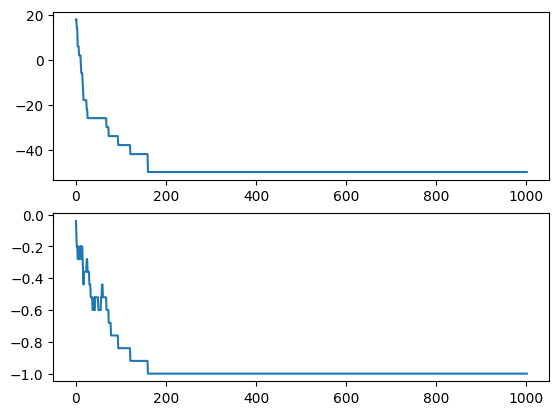

In [ ]:
#beta가 10일 때
plt.subplot(211)
plt.plot(E_list)

plt.subplot(212)
plt.plot(m_list)

## 함수화

In [ ]:
def spin_E_change(beta,L, t=1000):
  # t=1000 ##반복횟수
  # beta=0 ##
  # L=5 ##
  delta_m4 = np.exp(beta*(-4)) # 미리계산
  delta_m8 = np.exp(beta*(-8)) # 미리계산


  random_arr = np.random.randn(L*L)
  S = random_arr/abs(random_arr)
#  print(S)

  E_S = total_energy(S)
  m = np.sum(S)/len(S)

  E_list=[E_S]
  m_list=[m]
  S_list=[S]

#  print('first E:',E_S,', first m:',m)

  for t in range(t):
      # random number, 새로운 U생성
      U = S.copy()
      number = np.random.choice(len(S))
      U[number] *= -1
  #    print(number,'번째 flip')

      # delta
      delta = delta_E(S, number) # delta == (-E_S+E_U)
      E_U = E_S + delta
  #    print('delta=',delta, end=', ')

      # accept 확률
      if delta <= 0:
        accept_S_to_U = 1
      else:
        if delta == 4:
          accept_S_to_U = delta_m4
        elif delta == 8:
          accept_S_to_U = delta_m8
        else:
          print('error, delta=',delta)

      # accept, 그다음 S 확정, 측정
      if np.random.random() < accept_S_to_U:
        S = U.copy()
        E_S = E_U.copy()
      m = np.sum(S)/len(S)

      # if t%100 ==0: # 반복횟수가 너무 길어서 조금만 출력
      #   print('t=',t)
      #   print('now E:',E_S,', m:',m)

      E_list.append(E_S)
      m_list.append(m)
      S_list.append(S)

  return E_list, m_list, S_list

# beta 0.01~1.0

In [ ]:
E_m_list, m_m_list = [],[]

L=5
t=1000
for i in range(1,101):
  beta = i*0.01

  E_list, m_list, S_list = spin_E_change(beta,L, t=1000)

  E_mean = np.sum(E_list[200:])/800
  m_mean = np.sum(m_list[200:])/800

  E_m_list.append(E_mean)
  m_m_list.append(m_mean)

Text(0, 0.5, 'E_mean')

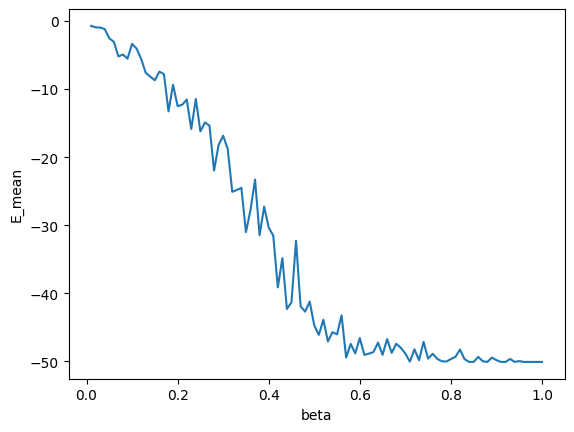

In [ ]:
#에너지 beta 0.1~1.0
plt.plot(np.arange(1,101)*0.01, E_m_list)

plt.xlabel('beta')
plt.ylabel('E_mean')

Text(0, 0.5, 'm_mean')

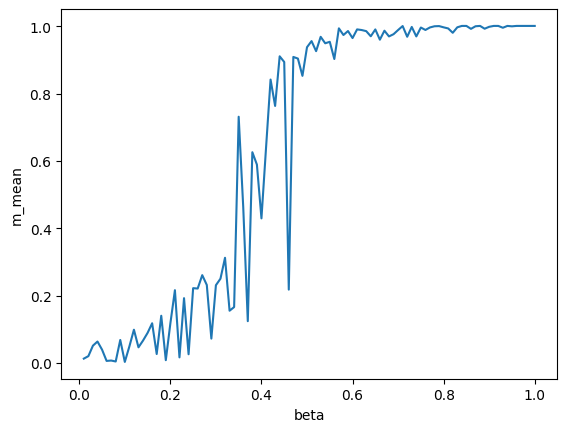

In [ ]:
#m beta 0.1~1.0
plt.plot(np.arange(1,101)*0.01, np.abs(m_m_list))

plt.xlabel('beta')
plt.ylabel('m_mean')